# Importing the necessary libraries

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2 as cv

## Splitting the data into train and test data
* 60k -> training data
* 10k -> testing data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Normalizing the data
> 28 * 28 grid being converted to 784 single column 

In [3]:
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

## Making the deep learning neural network with 2 hidden layers

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))

### Making of 2 hidden layers using relu as the activation function

In [5]:
model.add(keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=128, activation=tf.nn.relu))

## The output layer of 10 neurons (0-9)

In [6]:
model.add(keras.layers.Dense(units=10, activation=tf.nn.softmax))

## Compiling the model with adam optimizer

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Fitting the data

In [8]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2615 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1061 - accuracy: 0.9673
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0745 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0542 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0406 - accuracy: 0.9868


## Calculating the loss and the accuracy of the model on the testing dataset

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9739
Loss:  0.09354386478662491
Accuracy:  0.9739000201225281


## Running the model on the hand-written images (made on paint)

The predicted result is: 1


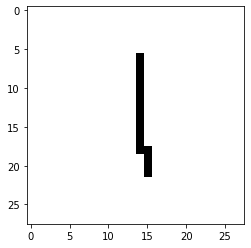

The predicted result is: 2


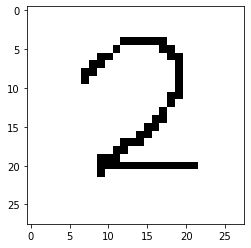

The predicted result is: 3


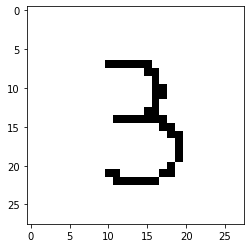

The predicted result is: 5


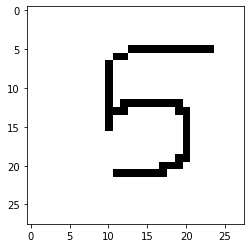

The predicted result is: 7


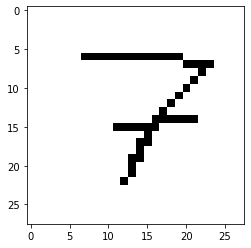

The predicted result is: 8


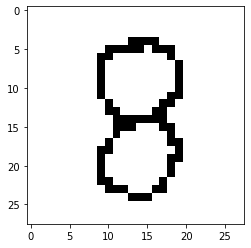

In [13]:
for x in range(1,7):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'The predicted result is: {np.argmax(prediction)}')
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()